# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## B. Load and understand the dataset

In [108]:
df = pd.read_excel('data.xlsx', header=0)

In [114]:
print("Columns in your DataFrame:")
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

print(f"\nDataFrame shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Columns in your DataFrame:
0: 'Name'
1: 'Posts / Share Frequently?'
2: 'Active?'
3: 'Replies to comments / messages?'
4: 'Number of Friends / Followers'
5: 'Personality'

DataFrame shape: (100, 6)

First 5 rows:
     Name  Posts / Share Frequently?  Active?  \
0  Maegan                          0        1   
1   Angel                          0        0   
2    Rose                          1        1   
3   Daisy                          1        1   
4   Julia                          0        1   

   Replies to comments / messages?  Number of Friends / Followers  Personality  
0                                1                            756            1  
1                                1                            163            0  
2                                1                            256            1  
3                                1                            424            1  
4                                1                            337            0  


In [115]:
X = df[['Posts / Share Frequently?', 'Active?', 'Replies to comments / messages?', 'Number of Friends / Followers']].values
y = df['Personality'].values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if 'Name' in df.columns:
    df = df.drop('Name', axis=1)
    print("Name column removed")

X shape: (100, 4)
y shape: (100,)
Name column removed


Display the first 5 rows of the dataset using `.head()`

In [59]:
df.head()

,Name,Posts / Share Frequently?,Active?,Replies to comments / messages?,Number of Friends / Followers,Personality
0,Maegan,0,1,1,756,1
1,Angel,0,0,1,163,0
2,Rose,1,1,1,256,1
3,Daisy,1,1,1,424,1
4,Julia,0,1,1,337,0


Display the summary of all the features of the dataset using `.info()`

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Posts / Share 
Frequently?         100 non-null    int64
 1   Active?                            100 non-null    int64
 2   Replies to 
comments / 
messages?  100 non-null    int64
 3   Number of 
Friends / Followers     100 non-null    int64
 4   Personality                        100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


Display the total number of samples from each label using `.value_counts()`

In [64]:
df['Personality'].value_counts()

,count
Personality,
1,79
0,21


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

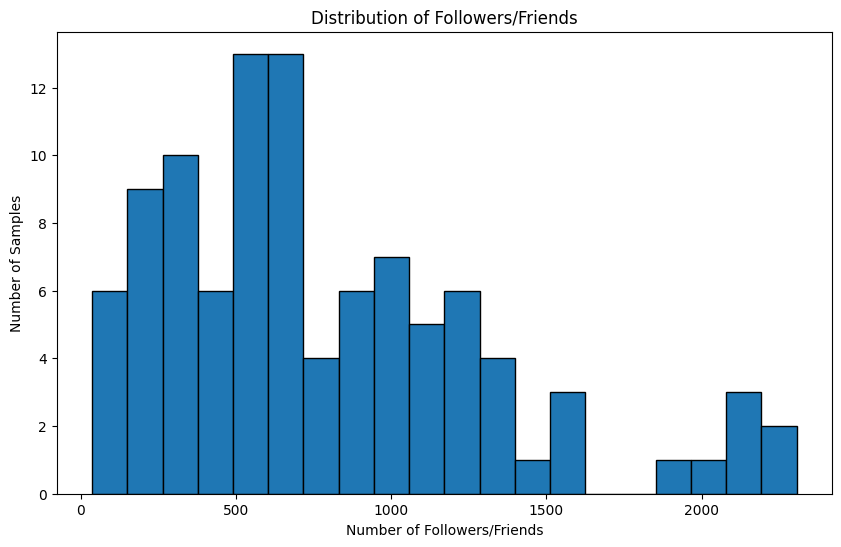

In [117]:
plt.figure(figsize=(10, 6))
plt.hist(df.iloc[:, 3], bins=20, edgecolor='black')  # 4th column (index 3)
plt.xlabel('Number of Followers/Friends')
plt.ylabel('Number of Samples')
plt.title('Distribution of Followers/Friends')
plt.show()

Remove the name column using `drop()` method

In [118]:
df = df.drop(df.columns[0], axis=1)

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [69]:
X = df.drop('Personality', axis=1).values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [70]:
y = df['Personality'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Display the dimensions of each variables using `.shape()`

In [120]:
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X.shape: (100, 4)
y.shape: (100,)
X_train.shape: (80, 4)
X_test.shape: (20, 4)
y_train.shape: (80,)
y_test.shape: (20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [121]:
knn = KNeighborsClassifier(n_neighbors=5)

Train the model using the `.fit()`

In [122]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Test the model using the `.predict()`

In [81]:
y_pred = knn.predict(X_test)

print(f"Test predictions: {y_pred}")
print(f"Actual test labels: {y_test}")

Test predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Actual test labels: [1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1]


## E. Evaluate the model

Create a confusion matrix

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0  4]
 [ 1 15]]


Display the accuracy

In [83]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.7500


Display the precision

In [84]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.7895


Display the recall

In [85]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9375


Display the f1-score

In [86]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.8571


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [123]:
your_features = np.array([[0, 1, 1, 640]])  # [Posts?, Active?, Replies?, Followers]
your_prediction = knn.predict(your_features)

print("Your personality prediction:")
if your_prediction[0] == 0:
    print("Introvert (0)")
else:
    print("Extrovert (1)")

Your personality prediction:
Extrovert (1)


In [ ]:
import pandas as pd
df = pd.read_csv('personality_test.csv')

In [124]:
prediction_proba = knn.predict_proba(your_features)
print(f"Prediction probabilities: {prediction_proba[0]}")
print(f"Introvert confidence: {prediction_proba[0][0]:.2%}")
print(f"Extrovert confidence: {prediction_proba[0][1]:.2%}")

Prediction probabilities: [0.2 0.8]
Introvert confidence: 20.00%
Extrovert confidence: 80.00%
